# **K-means - isotropic data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

(1000, 2) 
 (800, 2) (200, 2)


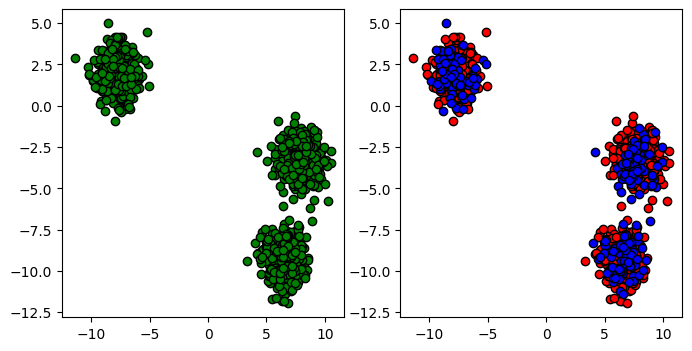

In [22]:
# Generate data
X, _ = make_blobs(n_samples = 1000 , n_features = 2, random_state = 6)

# Create train / test splits
X_train, X_test = train_test_split(X, test_size = 0.2, random_state= 1)

# Plot everything and print all shapes
_, axes = plt.subplots(1,2, figsize =(8,4))
axes[0].scatter( X[:, 0] , X[:, 1] , c = "g" , edgecolors='k')
axes[1].scatter( X_train[:, 0] , X_train[:, 1] , c = "r" , edgecolors='k')
axes[1].scatter( X_test[:, 0] , X_test[:, 1] , c = "b" , edgecolors='k')

print (X.shape, "\n", X_train.shape, X_test.shape)

## **Elbow method**

In [4]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [16]:
# Define num of clusters
clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]
elbow_distances = []

# Eval kmeans over each num of clusters
for cluster in clusters :
  kmeans = KMeans(n_clusters = cluster )
  kmeans.fit( X_train )
###--------------------------------------###
  centroides = kmeans.cluster_centers_
  predictions = kmeans.predict( X_test )
  distance = 0
#Medir la distacia para los centroides##
  for i in range(len(X_test)) :
    centroide = centroides[predictions[i]]
    distance += euclidean_distance( X_test[i] , centroide )

  elbow_distances.append(distance/len(X_test))

print (len(elbow_distances))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Distance')

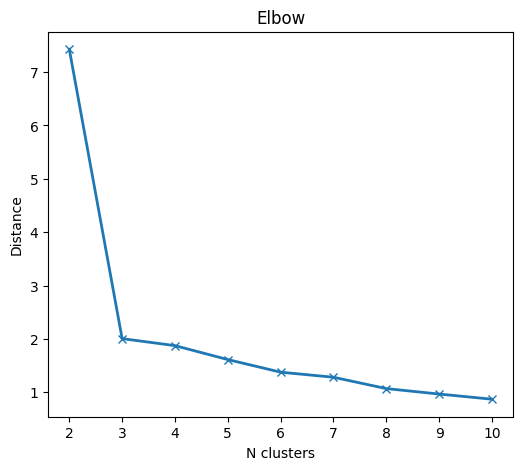

In [23]:
# Plot the elbow
_, ax = plt.subplots (figsize = (6,5))
ax.plot( clusters , elbow_distances , marker="x", linewidth = 2)
ax.set_title("Elbow")
ax.set_xlabel("N clusters")
ax.set_ylabel('Distance')

## **Silhouette method**

In [18]:
from sklearn.metrics import silhouette_score

# Define num of clusters
clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
silhouette_distances = []

# Eval kmeans over each num of clusters
for cluster in clusters :
  kmeans = KMeans(n_clusters = cluster )
  kmeans.fit( X_train )

  predictions = kmeans.predict( X_test )
  distance = silhouette_score( X_test , predictions , metric="euclidean")

  silhouette_distances.append(distance)

print (len(silhouette_distances))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Distance')

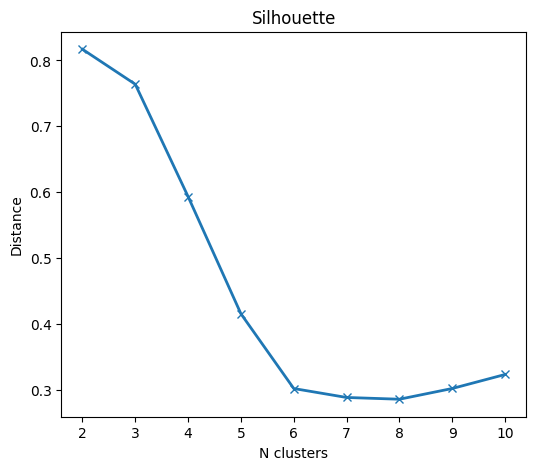

In [19]:
# Plot the silhouette
_, ax = plt.subplots (figsize = (6,5))
ax.plot( clusters , silhouette_distances , marker="x", linewidth = 2)
ax.set_title("Silhouette")
ax.set_xlabel("N clusters")
ax.set_ylabel('Distance')

# **K-Means - Real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [ ]:
data =
x = _
y = _

plt.scatter( _ , _ , cmap = plt.cm.Paired)
print (x.shape, y.shape)

## **Elbow**

In [ ]:
def elbow_kmeans(clusters, data):
  #
  # Create a function that computes the elbow for kmeans based in a list of clusters

  return elbow_distances

In [ ]:
clusters = [ _ ]
elbow = elbow_kmeans( _ , _ )

## **Silhouette**

In [ ]:
def silhouette_kmeans(clusters, data):
  #
  # Create a function that computes the silhouette for kmeans based in a list of clusters

  return silhouette_distances

In [ ]:
clusters = [ _ ]

silhouette = silhouette_kmeans( _ , _ )

## **Comparison**

In [ ]:
_, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].plot( _ , _ , marker = "x"); axes[0].set_title("Elbow")
axes[1].plot( _ , _ , marker = "x"); axes[1].set_title("Silhouette")

## **Clustering**

In [ ]:
kmeans = KMeans ( n_clusters = _ ).fit( _ )
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
predictions = kmeans.predict( _ )

In [ ]:
# Plot decision boundaries
_